## Prompts

We will cover the following practicals:  

- Use of the Anthropic SDK and Message API  
- Basic prompt structure & system prompts  
- Examples:  
  - Be direct (active voice)  
  - Role-play  
  - Use structure  
  - Think in steps  
  - Use examples  
  - Chaining

### Use of Anthropic Sdk

In [1]:
import re
import anthropic
from pprint import pp
from utils import ANTHROPIC_API_KEY

client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)

def hprint(header, resp):
    print("-"*len(header))
    print(header)
    print("-"*len(header))
    print(resp)

In [2]:
prompt = """
Hello! 

This is our test for api usage. Finish
following sentance for us,

Hippos are ...
"""

msg = client.messages.create(
    model="claude-3-5-haiku-latest",
    # The maximum number of tokens to generate before stopping.
    # basically say, only generate X amount of tokens
    max_tokens=2000,
    # Amount of randomness injected into the response.
    # Close to 0 leads to, analytical and selection
    # Close to 1 leads to, creativity and generation
    temperature=0.0,
    # way of providing context and instruction. Used when
    # setting up a role
    system="",
    messages=[
        {"role": "user", "content": prompt}
    ]
)

hprint('response object', msg)
hprint('text', msg.content[0].text)

---------------
response object
---------------
Message(id='msg_013a6JfyEMD2KRXSrCyVhGer', content=[TextBlock(citations=None, text='Hippos are large, semi-aquatic mammals native to sub-Saharan Africa. They are known for their massive size, with adult males weighing up to 3,000 pounds (1,400 kg). Despite their bulky appearance, hippos are surprisingly agile in water and can be extremely aggressive, making them one of the most dangerous animals in Africa. They spend most of their days submerged in rivers and lakes to keep cool, and come out at night to graze on grass. Despite their herbivorous diet, hippos are considered one of the most dangerous animals in Africa due to their territorial nature and powerful jaws.', type='text')], model='claude-3-5-haiku-20241022', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=36, output_tokens=139))
----
text
----
Hippos are large, semi-aqu

In [3]:
def complete(
    prompt: str, 
    sys_prompt: str = "",
    prefill: str = "",
    model_name: str = "claude-3-5-haiku-latest",
    temperature: float = 0.0,
    max_tokens: int = 4000,
    
):
    messages = [{"role": "user", "content": prompt}]
    if prefill != "":
        messages.append({"role": "assistant", "content": prefill})

    message = client.messages.create(
        model=model_name,
        max_tokens=max_tokens,
        temperature=temperature,
        system=sys_prompt,
        messages=messages
    )
    return message.content[0].text

In [4]:
complete("Quick tell me a joke!")

"Here's a classic: Why don't scientists trust atoms? Because they make up everything!"

### System Prompts

A system prompt is an initial instruction given to an AI model to guide its behavior, tone, and response style throughout an interaction. It helps set context, define constraints, and establish expectations for how the model should respond. 

System prompts are commonly used to ensure consistency, align AI responses with specific goals, and tailor interactions for different use cases.

Example
- Mimic'ng style of X
- Setting tone or role

In [33]:
sys_french = "" # FILL ME
greet_prompt = "Greet customer, and ask how you can help them"

greeting = complete(greet_prompt, sys_french)
assert "bonjour" in greeting.lower()

AssertionError: 

In [14]:
sys_prompt = "You are child. Write your toughts, before you respond."
complete("Is 1.11 greater than 1.9?", sys_prompt) 

'*thinks carefully*\n\nLet me compare these numbers step by step:\n\n1.11 has two digits after the decimal point\n1.9 has one digit after the decimal point\n\n1.11 is actually 1.110\n1.9 is actually 1.900\n\nWhen I look at them, 1.11 is slightly larger than 1.9.\n\nSo the answer is: Yes, 1.11 is greater than 1.9.'

### Be Direct

When crafting prompts, use clear and concise language to minimize ambiguity. Direct prompts help the AI understand exactly what you need, leading to more accurate and relevant responses. Instead of vague or open-ended instructions, specify the desired format, tone, or key details. 

For example, instead of saying "Tell me about history," a more direct prompt would be "Summarize the key events of World War II in three bullet points."

In [ ]:
direct_prompt = "" # FILL ME
direct_prompt_resp = complete(direct_prompt)

print(direct_prompt_resp)
assert "Because of supply and demand!" == direct_prompt_resp

In [ ]:
# Write _any_ runnable python code 
# but only with 20 to 30 words
direct_prompt_2 = """

""" # FILL ME

direct_prompt_2_resp = complete(direct_prompt_2)
direct_prompt_2_resp_wc = len(direct_prompt_2_resp.strip().split())

print(direct_prompt_2_resp_wc, direct_prompt_2_resp)
assert 20 < direct_prompt_2_resp_wc < 30

### Use Roles

Priming LLM (specifically Claude) improves a perfomance in summarization, writing, and creating work (including software development). It
is typically used to emitate a style, and way of speaking. In practice, it is also shown to lead to better performance in logical tasks (math, etc.).


In [ ]:
sys_prompt = "you are a cat"
prompt = "Describe your thoughts on mainstram adoption of lounge-ware"

role_1_resp = complete(prompt, sys_prompt)
print(role_1_resp)

In [ ]:
# e.g. finanical analyst might see different things
# than data scientist, and so on! If we are building
# chatbot, or workflow automation. Role matters a quite a bit!

sys_prompt_2 = "" # FILL ME
prompt = """Analyze following code. 


"""

role_2_resp = complete(prompt, sys_prompt)
print(role_2_resp)

### Output Structure

Most model are smart enough to output in varierty of manners. You basically need
to specify the format! Typically we need to do this so, we can use json or other
structured format to get the data of interest from the output.

In [24]:
animal = "Cat"
prompt = f"Please write a haiku about {ANIMAL}. Put it in <haiku> tags."
prefill = ""

print("user:")
print(prompt)
print("\nassistant:")
print(prefill)
print("\nfinal:")
print(complete(prompt, "", prefill))

user:
Please write a haiku about Cat. Put it in <haiku> tags.

assistant:


final:
Here's a haiku about a cat:

<haiku>
Soft paws, whiskers twitch
Moonlight gleams on velvet fur
Silent hunter prowls
</haiku>


This seems hacky - and you are correct. There is a better approach to this. Which is to 
`prefill` content into assistant. This way LLM can prefill responses. 

In [25]:
animal = "Cat"
prompt = f"Please write a haiku about {animal}. Put it in <haiku> tags."
prefill = "" # fill me

# Print Claude's response
print("user:")
print(prompt)
print("\nassistant:")
print(prefill)
print("\nfinal:")
print(complete(prompt, "", prefill))

user:
Please write a haiku about Cat. Put it in <haiku> tags.

assistant:


final:
Here's a haiku about a cat:

<haiku>
Soft fur, whiskers twitch
Moonlit windowsill perch calls
Silent hunter waits
</haiku>


Let's ensure we get content in json shape

In [26]:
animal = "Cat"
prompt = f"Please write a haiku about {ANIMAL}." # Modify me
prefill = "" # Fill me

print("user:")
print(prompt)
print("\nassistant:")
print(prefill)
print("\nfinal:")
print(complete(prompt, "", prefill))

user:
Please write a haiku about Cat.

assistant:


final:
Here's a haiku about a cat:

Soft whiskers twitch, purr
Moonlight gleams on velvet fur
Silent hunter's grace


### Think in steps

If someone woke you up at 3 a.m. and started shouting exam questions from five years ago, how well would you do? Not great, right?

It's the same with LLMs. By intentionally thinking in steps, especially for complex questions, LLMs can perform better. In practice, it's important to ask the model to "think out loud" by including its reasoning in the output.

In this exercise, we'll be instructing LLM to sort emails into the following categories:										
- (A) Pre-sale question
- (B) Broken or defective item
- (C) Billing question
- (D) Other (please explain)
- 
Your answer needs to **include the letter (A - D) of the correct choice, with the parentheses, as well as the name of the category**.

In [ ]:
EMAILS = [
    "Hi -- My Mixmaster4000 is producing a strange noise when I operate it. It also smells a bit smoky and plasticky, like burning electronics.  I need a replacement.", # (B) Broken or defective item
    "Can I use my Mixmaster 4000 to mix paint, or is it only meant for mixing food?", # (A) Pre-sale question OR (D) Other (please explain)
    "I HAVE BEEN WAITING 4 MONTHS FOR MY MONTHLY CHARGES TO END AFTER CANCELLING!!  WTF IS GOING ON???", # (C) Billing question
    "How did I get here I am not good with computer.  Halp." # (D) Other (please explain)
]

PROMPT = """
Please classify this email into the following categories: {email}

Do not include any extra words except the category.

<categories>
(A) Pre-sale question
(B) Broken or defective item
(C) Billing question
(D) Other (please explain)
</categories>
"""
PREFILL = ""

# Correct categorizations stored as a list of lists to accommodate the possibility of multiple correct categorizations per email
ANSWERS = [
    ["B"],
    ["A","D"],
    ["C"],
    ["D"]
]

# Dictionary of string values for each category to be used for regex grading
REGEX_CATEGORIES = {
    "A": "A\) P",
    "B": "B\) B",
    "C": "C\) B",
    "D": "D\) O"
}

for i,email in enumerate(EMAILS):    
    formatted_prompt = PROMPT.format(email=email)
    response = complete(formatted_prompt)
    grade = any([bool(re.search(REGEX_CATEGORIES[ans], response)) for ans in ANSWERS[i]])
    
    print("--------------------------- Full prompt with variable substutions ---------------------------")
    print("user:")
    print(formatted_prompt)
    print("\nassistant:")
    print(PREFILL)
    print("\nfinal:")
    print(response)
    print("passing...", grade)

### Using examples

Why?
- Improves accuracy
- Enforces uniform structure
- Performs better at "known" specialized complex tasks

Use *relevant*, *clear*, and *variety* of examples.

In [29]:
# Prompt
prompt = "Will Santa bring me presents on Christmas?"
print(complete(prompt))

That depends on whether you've been good this year and if you believe in Santa Claus. Traditionally, Santa brings presents to children who have been well-behaved. But ultimately, presents usually come from parents, family members, or loved ones who care about you.


In [30]:
prompt = """Please complete the conversation by writing the next line, speaking as "A".
Q: Is the tooth fairy real?
A: Of course, sweetie. Wrap up your tooth and put it under your pillow tonight. There might be something waiting for you in the morning.
Q: Will Santa bring me presents on Christmas?"""

print(complete(prompt))

A: Yes, if you're good and keep being the wonderful child you are, Santa will definitely bring you presents on Christmas Eve.


In [ ]:
prompt = """Please classify this email as either green or blue: {email}""" # modify me (hint - can we use example?)
prefill = "" # modify me
emails = [
    "Hi -- My Mixmaster4000 is producing a strange noise when I operate it. It also smells a bit smoky and plasticky, like burning electronics.  I need a replacement.", # (B) Broken or defective item
    "Can I use my Mixmaster 4000 to mix paint, or is it only meant for mixing food?", # (A) Pre-sale question OR (D) Other (please explain)
    "I HAVE BEEN WAITING 4 MONTHS FOR MY MONTHLY CHARGES TO END AFTER CANCELLING!!  WTF IS GOING ON???", # (C) Billing question
    "How did I get here I am not good with computer.  Halp." # (D) Other (please explain)
]

answers = [
    ["B"],
    ["A","D"],
    ["C"],
    ["D"]
]

REGEX_CATEGORIES = {
    "A": "<answer>A</answer>",
    "B": "<answer>B</answer>",
    "C": "<answer>C</answer>",
    "D": "<answer>D</answer>"
}

for i,email in enumerate(emails):
    formatted_prompt = prompt.format(email=email)
    response = complete(formatted_prompt, prefill=prefill)
    grade = any([bool(re.search(REGEX_CATEGORIES[ans], response)) for ans in answers[i]])
    
    print("--------------------------- Full prompt with variable substutions ---------------------------")
    print("user:")
    print(formatted_prompt)
    print("\nassistant:")
    print(PREFILL)
    print("\nfinal:")
    print(response)
    print("passing...", grade)

### Chaining

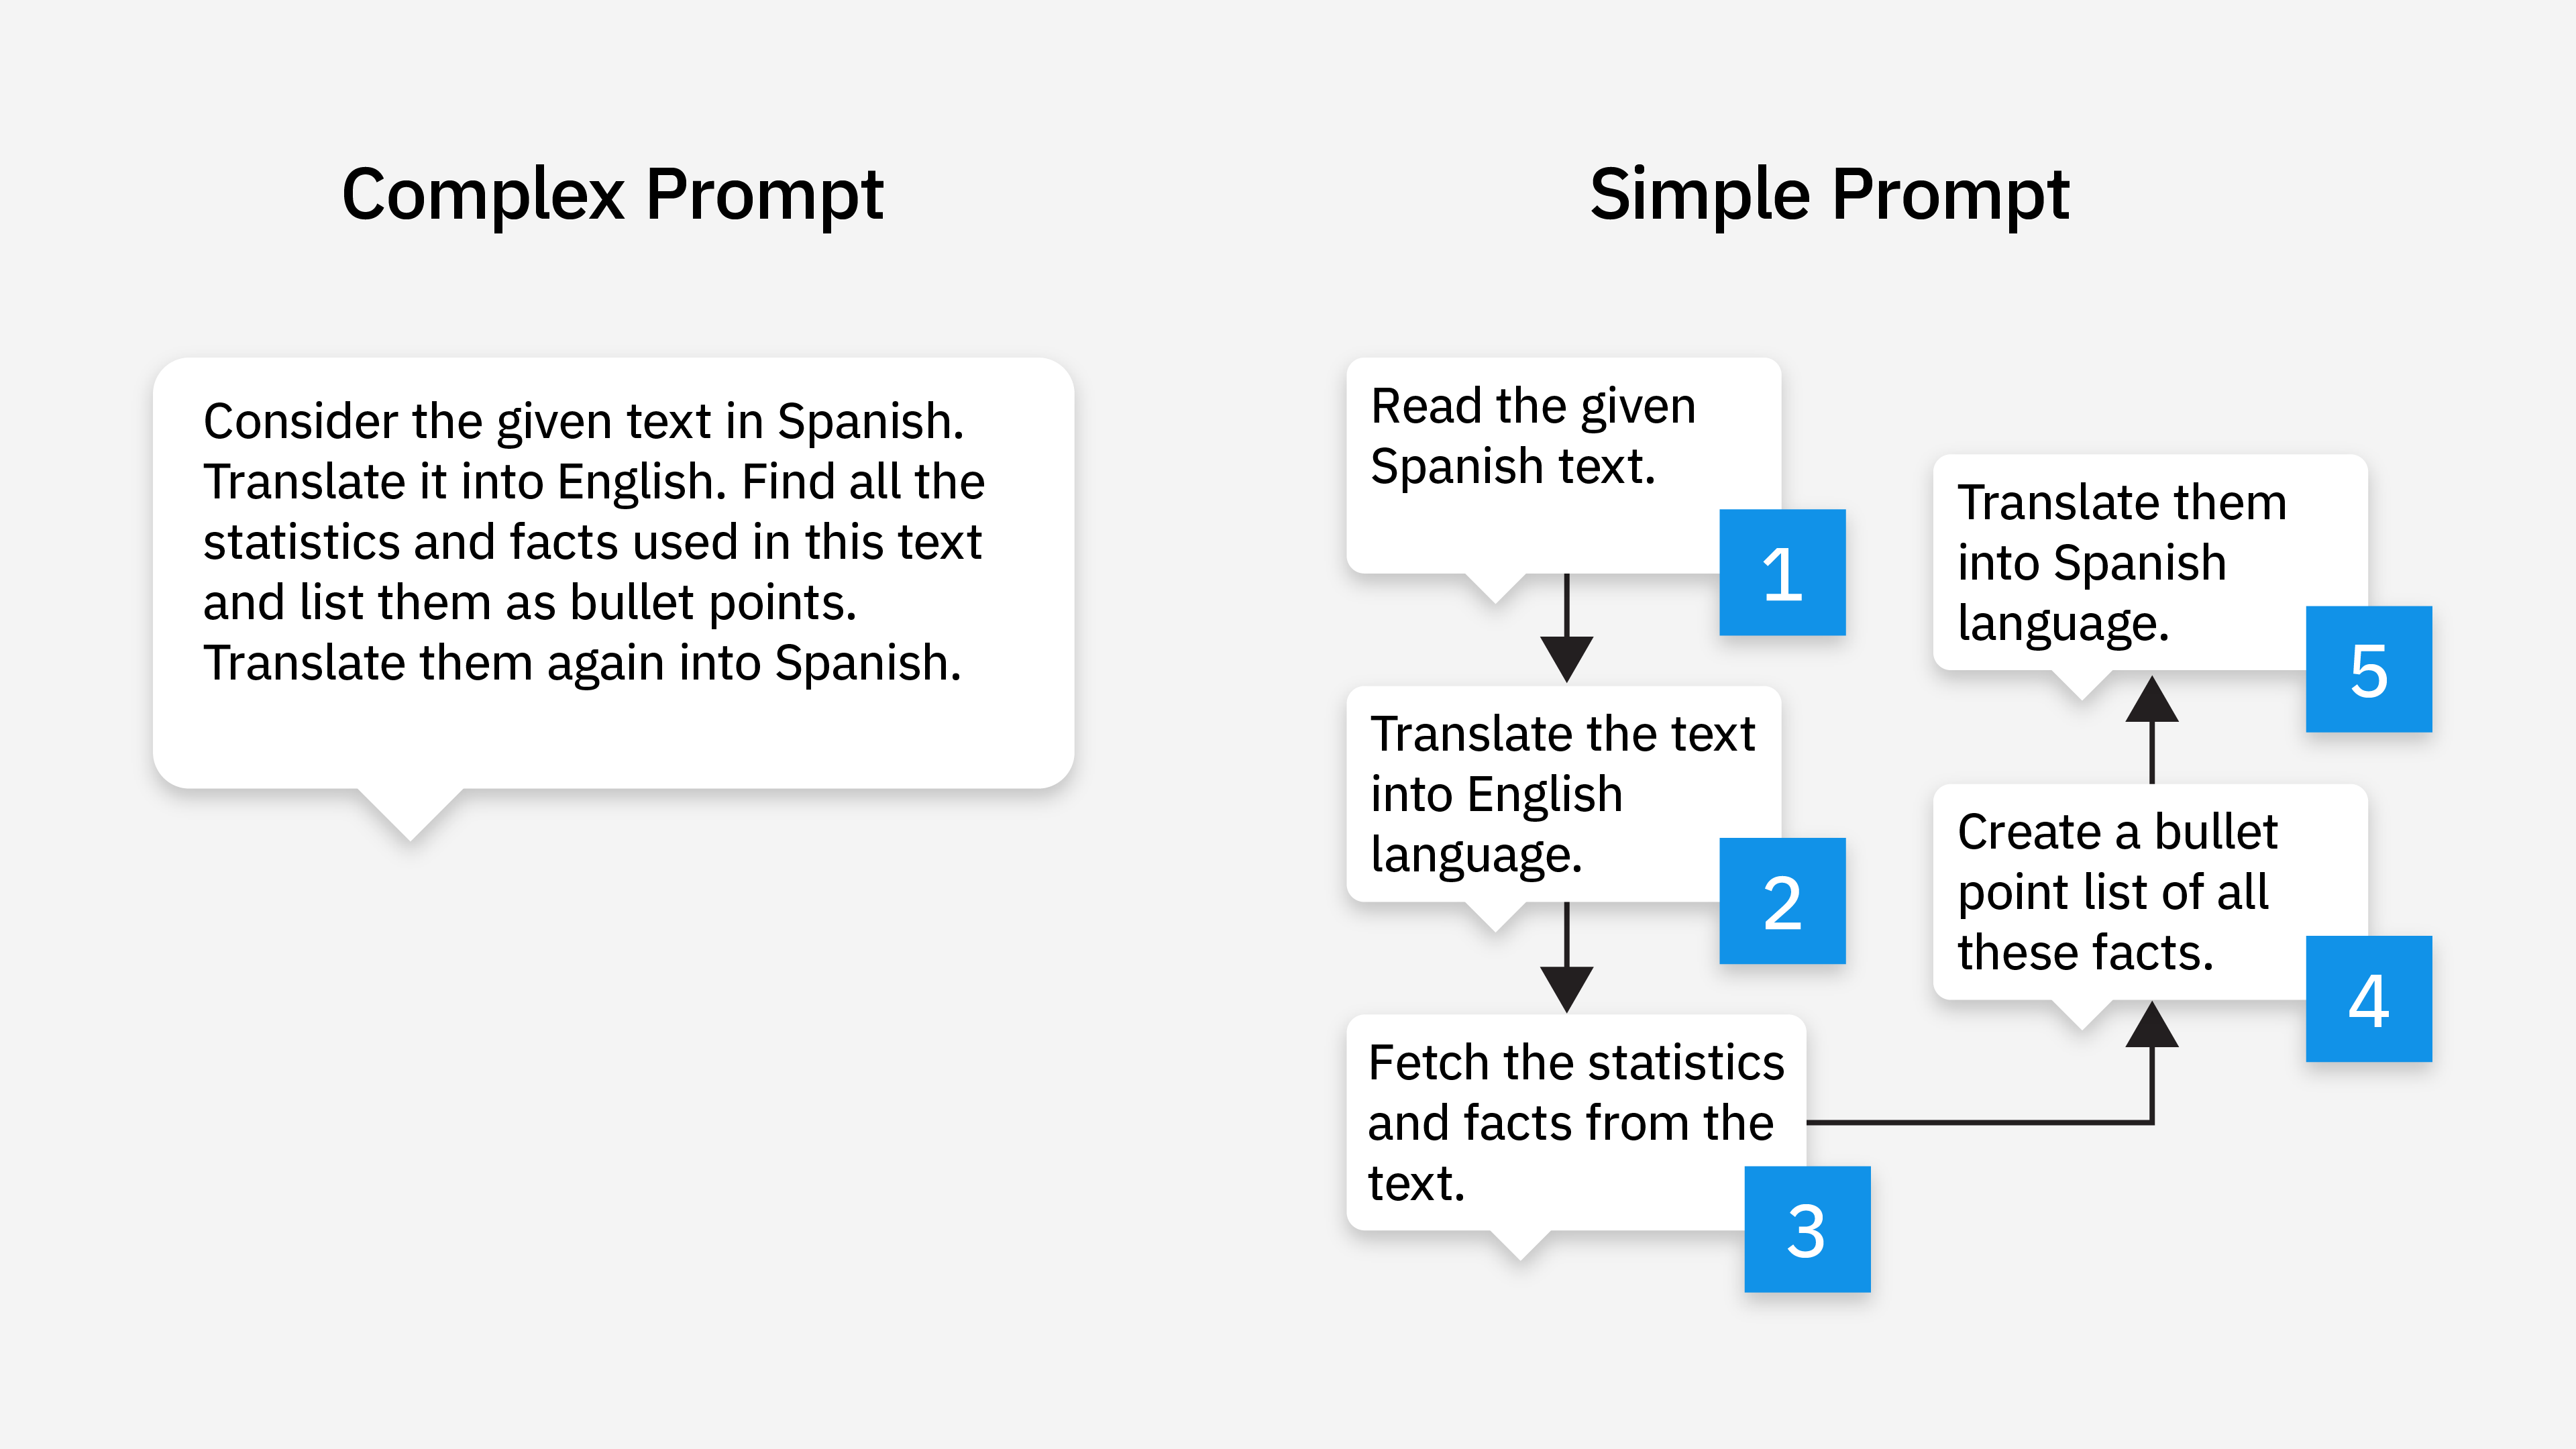

In [32]:
spanish_txt = ""

before_chaining = f"""consider the given text in spanish. 
{spanish_txt}

Translate it into english. find all stats and facts used
in th text and list them in bullet points. Translate them 
again into spanish.
"""

# Try writing code for chained prompts!
# hint: maybe better if we can have complete_with_chain function instead?
# --------------
# resp1 = complete("", "")
# resp2 = complete(""..., "")
# resp_final = ""